This notebook contains the code for segregating customer on the basis of their purchase behaviour and salary.
Model used K-mean clustering.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [33]:
customer_data=pd.read_csv("/content/Mall_Customers.csv")

type(customer_data)

customer_data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
customer_data.shape

(200, 5)

In [28]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
#checking for missing values

customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Extracting only annual income and spending score for model building.

In [ ]:
x=customer_data.iloc[:,[3,4]].values


print(x)

Choosing number of clusters.

WCSS- Within cluster sum of square.

In [ ]:
#Finding WCSS values for 10 clusters and then decide how many clusters one should make out of this data

wcss=[]


for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans.fit(x)

  wcss.append(kmeans.inertia_)


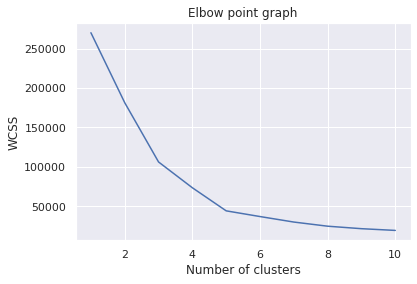

In [38]:
#plotting wcss values


sns.set()

plt.plot(range(1,11), wcss)

plt.title("Elbow point graph")

plt.xlabel("Number of clusters")

plt.ylabel("WCSS")

plt.show()

Optimum number of clusters is 5 .(Interpreted using elbow point graph)

Training K-mean cluster model.

In [45]:
kmean=KMeans(n_clusters=5, init="k-means++", random_state=0)

kmean.fit(x)

clust_predict=kmean.fit_predict(x)

print(clust_predict)
print(len(x))

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
200


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing all the clusters.

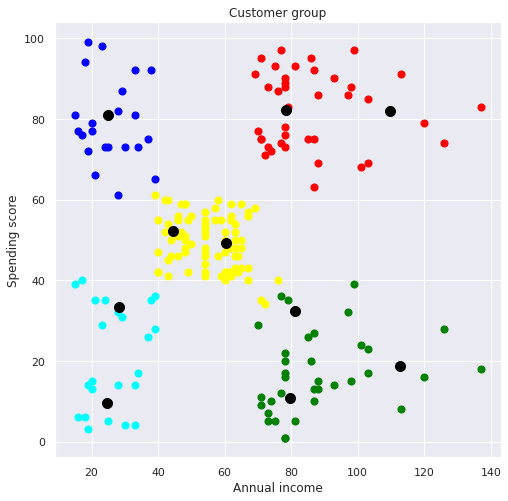

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(x[clust_predict==0,0], x[clust_predict==0,1], s=50, c='green', label="cluster1")
plt.scatter(x[clust_predict==1,0], x[clust_predict==1,1], s=50, c='yellow', label="cluster2")
plt.scatter(x[clust_predict==2,0], x[clust_predict==2,1], s=50, c='red', label="cluster3")
plt.scatter(x[clust_predict==3,0], x[clust_predict==3,1], s=50, c='blue', label="cluster4")
plt.scatter(x[clust_predict==4,0], x[clust_predict==4,1], s=50, c='cyan', label="cluster5")


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="centroid")

plt.title("Customer group")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()

